# HW5: Prob 1: Create a 2D embedding of the CIFAR-10 comparing different manifold learning algorithms

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is not that unlike the MNIST data set in that it is is 6K instances of small images. Unlike MNIST they are color images which are 32x32x3 (32 pixels wide, 32 pixels high, 3 color channels). The 3 color channels are red, green and blue. Each pixel is represented by a number between 0 and 255. The data set is divided into 10 classes. The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The data set is available in the keras.datasets module. You can load it with the following code:

```python
from torchvision.datasets import CIFAR10
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())
```

Your goal is to compare different manifold learning algorithms on this data set. You should use the following algorithms:

* Principle Component Analysis
* Isomap Embedding
* Locally Linear Embedding
* Multidimensional scaling.
* SpectralEmbedding
* T-distributed Stochastic Neighbor Embedding

All of these algorithms are available in the sklearn library. In addition you should use also try the UMAP algorithm which is available for python as a library [umap](https://umap-learn.readthedocs.io/en/latest/basic_usage.html). In each of these cases you should project the data into 2D and color the data by the class in which it belongs.

Two references which might help the [sklearn documentation](https://scikit-learn.org/stable/modules/manifold.html) and Jake Vanderplas' book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html).

Practice creating a well formatted Jupyter notebook. You should have a title, a description of the data set, a description of the algorithms, a description of the results, and a discussion of the results. You should also have a conclusion. Your notebook should not have lots of code cells with no explanation. It should also not have lots of text outputs. You may need that during your development but by the time you submit, please clean it up.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms


In [2]:
# Define the transformation
transform = transforms.Compose([transforms.ToTensor()])

# Load the dataset with the defined transformation
Large_dataset = CIFAR10(root='data/', download=True, transform=transform)
dataset = CIFAR10(root='data/', train=False, transform=transform)

Files already downloaded and verified


In [3]:
print(len(dataset), len(Large_dataset))

10000 50000


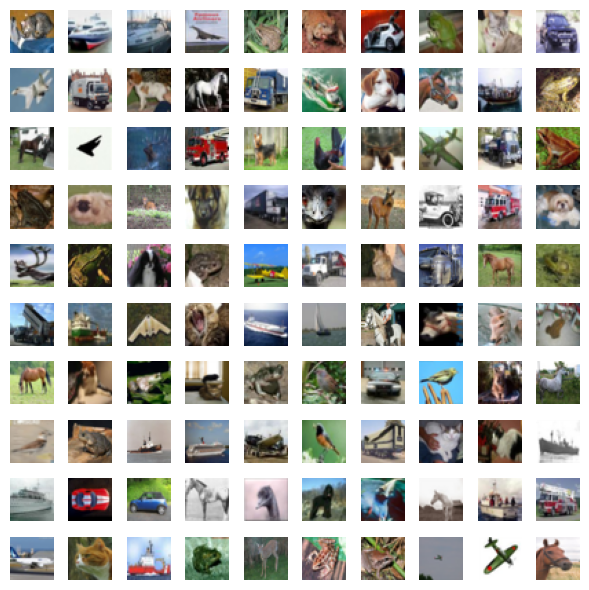

In [4]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(dataset[idx][0].permute(1, 2, 0))  # Accessing the image tensor and permuting dimensions for display
    ax.axis("off")
plt.tight_layout()
plt.show()

In [5]:
# Flatten the images
X = np.array([np.array(x[0]).flatten() for x in dataset])
n_components = 2
n_neighbors= 10


In [6]:
import mpl_toolkits.mplot3d
from matplotlib import ticker

def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(6, 6), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    scatter = ax.scatter(points[:, 0], points[:, 1], c=points_color, s=50, alpha=0.8)
    cbar = plt.colorbar(scatter, ax=ax, boundaries=np.arange(11)-0.5)
    cbar.set_ticks(np.arange(10))
    plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE

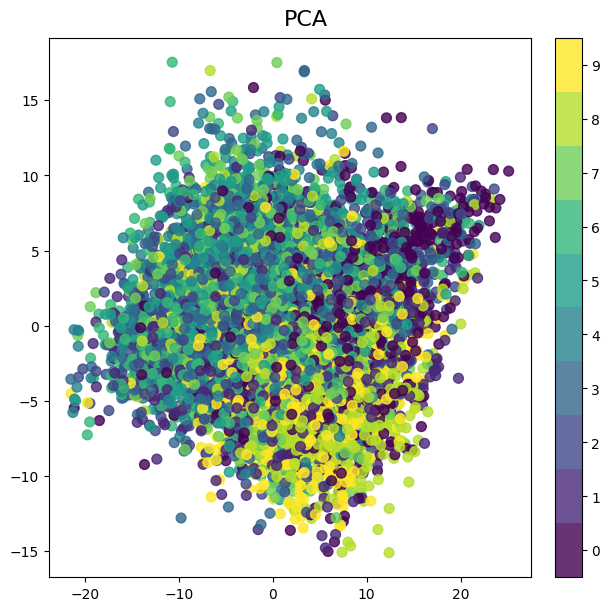

In [8]:
# Apply Principle Component Analysis (PCA)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

plot_2d(X_pca, dataset.targets, "PCA")

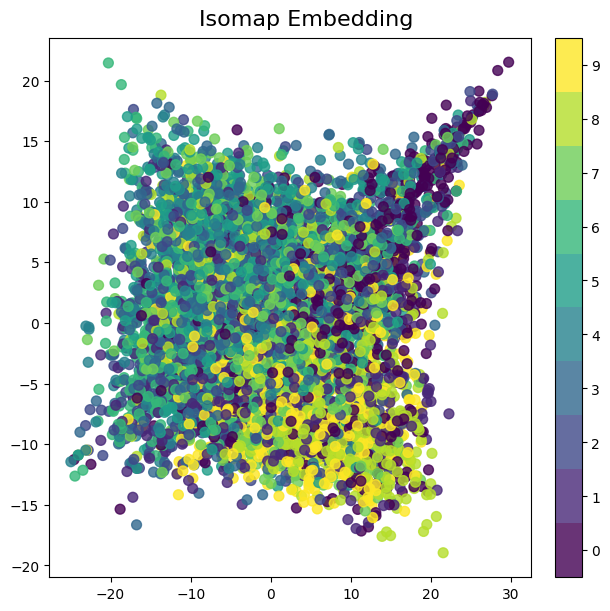

In [9]:
# Apply Isomap Embedding
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(X_pca)

plot_2d(S_isomap, dataset.targets, "Isomap Embedding")

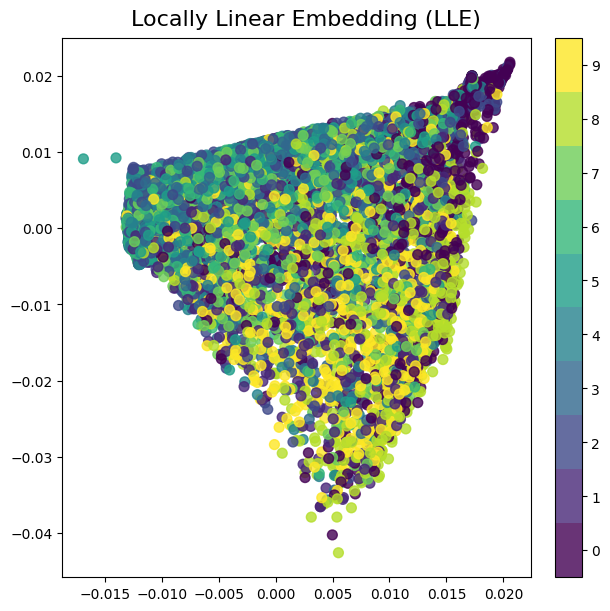

In [10]:
# Apply Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=n_components)
X_lle = lle.fit_transform(X)

plot_2d(X_lle, dataset.targets, "Locally Linear Embedding (LLE)")

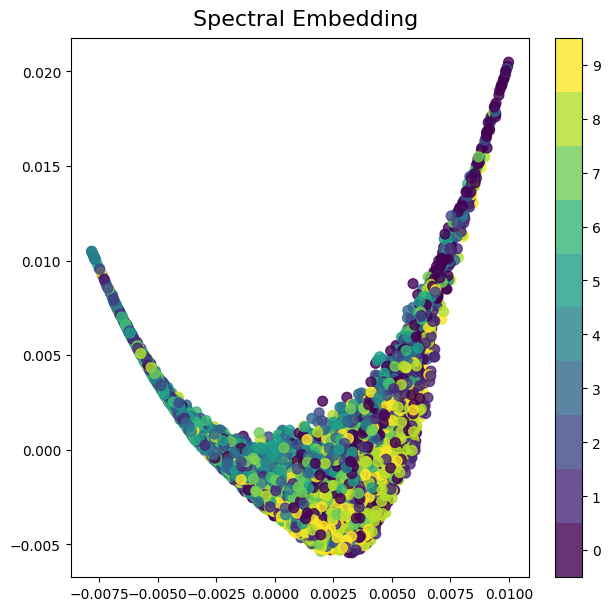

In [11]:
# Apply Spectral Embedding
spectral = SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors, random_state=42)
X_spectral = spectral.fit_transform(X)

plot_2d(X_spectral, dataset.targets, "Spectral Embedding")

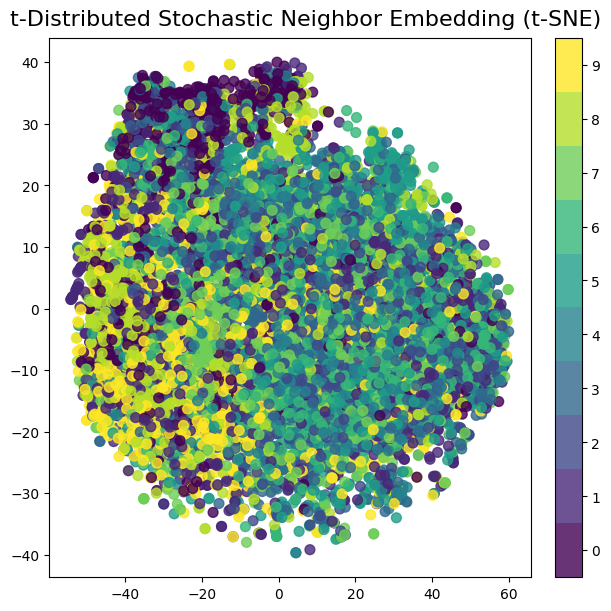

In [14]:
# Apply t-Distributed Stochastic Neighbor Embedding (t-SNE)
tsne = TSNE(n_components=n_components)
X_tsne = tsne.fit_transform(X)

plot_2d(X_tsne, dataset.targets, "t-Distributed Stochastic Neighbor Embedding (t-SNE)")

In [15]:
!pip install umap-learn

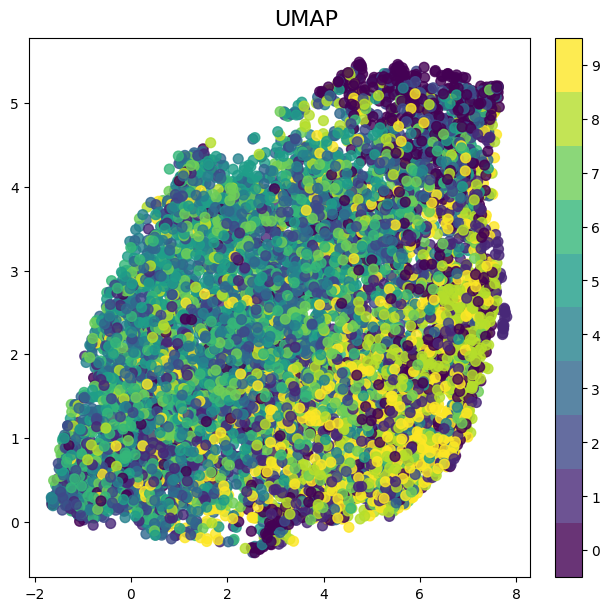

In [16]:
import umap.umap_ as umap

# UMAP transformation
umap_model = umap.UMAP(n_components=n_components)
X_umap = umap_model.fit_transform(X)

plot_2d(X_umap, dataset.targets, "UMAP")

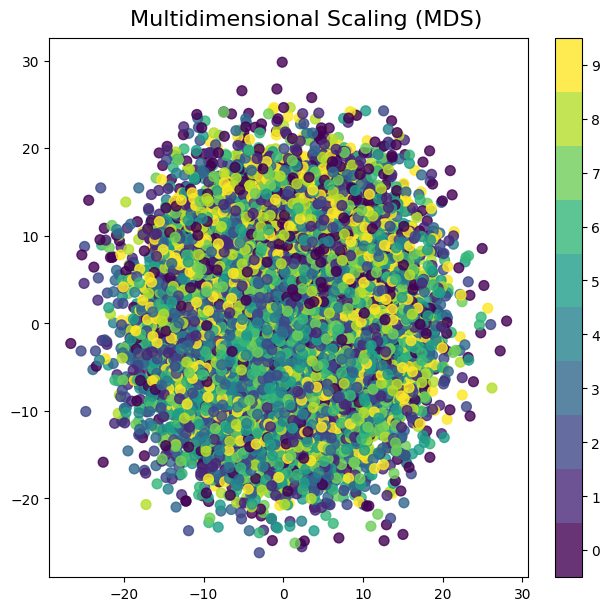

In [17]:
# Apply Multidimensional Scaling (MDS)
mds = MDS(n_components=n_components, n_init=1, max_iter=50, normalized_stress=False)
X_mds = mds.fit_transform(X)

plot_2d(X_mds, dataset.targets, "Multidimensional Scaling (MDS)")